# **Import Library**

In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **DataLoad**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#pd.read_csv('/content/Symptom2Disease.csv')
import csv
data = pd.read_csv('/content/drive/MyDrive/Symptom2Disease.csv', delimiter=';')
# karena kita split filenya pake , jadi harus dituliskan delimiter ,

Mounted at /content/drive


In [ ]:
disease_counts = data['label'].value_counts()
print(disease_counts)

label
Psoriasis                          50
Varicose Veins                     50
peptic ulcer disease               50
drug reaction                      50
gastroesophageal reflux disease    50
allergy                            50
urinary tract infection            50
Malaria                            50
Jaundice                           50
Cervical spondylosis               50
Migraine                           50
Hypertension                       50
Bronchial Asthma                   50
Acne                               50
Arthritis                          50
Dimorphic Hemorrhoids              50
Pneumonia                          50
Common Cold                        50
Fungal infection                   50
Dengue                             50
Impetigo                           50
Chicken pox                        50
Typhoid                            50
diabetes                           50
Name: count, dtype: int64



# Data Preprocessing

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Case folding (convert text to lowercase)
def case_folding(text_series):
    return text_series.str.lower()

data_revised = data.copy()  # Create a copy of the original data for revisions
data_revised['text'] = case_folding(data_revised['text'])  # Assuming the column to clean is 'text'

# Step 2: Remove punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def remove_punctuation(text):
    return ''.join([char for char in text if char not in punctuations])

data_revised['text'] = data_revised['text'].apply(remove_punctuation)

# Step 3: Remove stopwords
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
custom_stopwords = {'ive', 'lot', 'im'}
stop_words = stop_words.union(custom_stopwords)

data_revised['text'] = data_revised['text'].apply(lambda sentence: ' '.join(
    [word for word in nltk.word_tokenize(sentence) if word.lower() not in stop_words]
))

# Step 4: Tokenization (convert sentence to a list of words)
data_revised['text'] = data_revised['text'].apply(nltk.word_tokenize)

# Step 5: Lemmatization (reduce words to their base form)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

data_revised['text'] = data_revised['text'].apply(lambda sentence: ' '.join(
    [lemmatizer.lemmatize(word) for word in sentence]
))

# Step 6: Apply TF-IDF
tfidf_vectorizer = TfidfVectorizer()
data_tfidf = tfidf_vectorizer.fit_transform(data_revised['text'])

# Output the TF-IDF transformed data (as sparse matrix)
print(data_tfidf)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


  (0, 418)	0.16222031904004106
  (0, 1064)	0.14643512882484233
  (0, 936)	0.16827764705187032
  (0, 73)	0.22194960590767734
  (0, 679)	0.2195975751886655
  (0, 1225)	0.3915553711183681
  (0, 856)	0.2975627979775866
  (0, 1327)	0.3183929247545449
  (0, 955)	0.1954080059096226
  (0, 651)	0.22695846285382387
  (0, 261)	0.30705404473495823
  (0, 362)	0.23743212898507812
  (0, 1002)	0.40835625422626043
  (0, 857)	0.2758631632885976
  (1, 1064)	0.1277461782960467
  (1, 862)	0.571222478444561
  (1, 394)	0.2325518807737005
  (1, 660)	0.2856112392222805
  (1, 373)	0.2815332720455337
  (1, 1001)	0.306268628886372
  (1, 831)	0.20622783511588277
  (1, 9)	0.22963980867757766
  (1, 166)	0.2482174241988215
  (1, 1119)	0.35623932098350314
  (1, 1021)	0.2547302010433578
  :	:
  (1198, 620)	0.42100004364369376
  (1198, 1238)	0.16029036010734488
  (1198, 153)	0.16143850520347175
  (1198, 588)	0.2675802378893475
  (1198, 1159)	0.25535985369923264
  (1198, 1283)	0.2753250356488096
  (1198, 1108)	0.49176197

# **Data Training Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# X should be your TF-IDF matrix (features), and y should be your labels (target)
X = data_tfidf  # TF-IDF matrix (already preprocessed)
y = data['label']  # Assuming your original dataset has a 'label' column

# Split the data into training and testing sets (stratified by label for balanced classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the sizes of the split datasets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Check label distribution in the training and testing sets
train_label_counts = y_train.value_counts()
print(f"\nLabel distribution in the training set:\n{train_label_counts}")

test_label_counts = y_test.value_counts()
print(f"\nLabel distribution in the testing set:\n{test_label_counts}")


Training set size: 960
Testing set size: 240

Label distribution in the training set:
label
Chicken pox                        40
Common Cold                        40
Migraine                           40
Psoriasis                          40
Typhoid                            40
Jaundice                           40
Fungal infection                   40
Varicose Veins                     40
Bronchial Asthma                   40
diabetes                           40
Cervical spondylosis               40
peptic ulcer disease               40
Impetigo                           40
urinary tract infection            40
gastroesophageal reflux disease    40
Acne                               40
allergy                            40
Hypertension                       40
Arthritis                          40
Pneumonia                          40
Dengue                             40
drug reaction                      40
Dimorphic Hemorrhoids              40
Malaria                           

# **Machine learning model**

**Logistic Regression**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))



Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       0.91      1.00      0.95        10
                    Chicken pox       0.90      0.90      0.90        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       0.89      0.80      0.84        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Step 4: Evaluate the Random Forest model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Step 5: Print a detailed classification report for Random Forest predictions
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.93
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       0.70      0.70      0.70        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       0.88      0.70      0.78        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       0.91      1.00      0.95        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                     

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.82
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      0.90      0.95        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       0.39      0.70      0.50        10
                    Common Cold       0.90      0.90      0.90        10
                         Dengue       0.71      0.50      0.59        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       0.82      0.90      0.86        10
                   Hypertension       1.00      0.90      0.95        10
                       Impetigo       1.00      0.80      0.89        10
                       Jaundice       1.00      0.80      0.89        10
                     

# **SVM(Support Vector Machine)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels, e.g., 'linear', 'rbf'
svm_model.fit(X_train, y_train)  # Train the model on TF-IDF transformed training data

# Step 3: Make predictions on the test data using the trained SVM model
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the SVM model performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Step 5: Print a detailed classification report for SVM predictions
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.95
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       1.00      1.00      1.00        10
           Cervical spondylosis       1.00      1.00      1.00        10
                    Chicken pox       0.82      0.90      0.86        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       0.89      0.80      0.84        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       1.00      1.00      1.00        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data using the trained KNN model
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the KNN model performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Step 5: Print a detailed classification report for KNN predictions
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.93
                                 precision    recall  f1-score   support

                           Acne       0.91      1.00      0.95        10
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.91      1.00      0.95        10
           Cervical spondylosis       0.91      1.00      0.95        10
                    Chicken pox       0.69      0.90      0.78        10
                    Common Cold       1.00      1.00      1.00        10
                         Dengue       0.86      0.60      0.71        10
          Dimorphic Hemorrhoids       1.00      1.00      1.00        10
               Fungal infection       1.00      1.00      1.00        10
                   Hypertension       0.91      1.00      0.95        10
                       Impetigo       1.00      1.00      1.00        10
                       Jaundice       1.00      1.00      1.00        10
                        Malaria

In [ ]:
# Step 1: Define the preprocess_text function
def preprocess_text(text):
    # Example preprocessing (adjust this based on your training preprocessing)
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize tokens
    return ' '.join(tokens)  # Return preprocessed tex

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Step 2: Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the KNN model performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred_knn))

# Step 5: Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Step 6: Extract unique class labels from y_train (or you can use y_test)
class_labels = np.unique(y_train)

# Step 7: Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




ValueError: could not convert string to float: "I've been quite itchy recently, and I have rashy patches all over my skin. There are also certain regions that are darker in colour than the rest of my skin, and I've got some firm lumps."

# Bert

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.2 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       label                                               text
0  Psoriasis  I have been experiencing a skin rash on my arm...
1  Psoriasis  My skin has been peeling, especially on my kne...
2  Psoriasis  I have been experiencing joint pain in my fing...
3  Psoriasis  There is a silver like dusting on my skin, esp...
4  Psoriasis  My nails have small dents or pits in them, and...
Index(['label', 'text'], dtype='object')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. U

Epoch,Training Loss,Validation Loss
1,2.909700,2.811907
2,2.460700,2.320306
3,2.164800,2.131089


BERT Accuracy: 0.76
                                 precision    recall  f1-score   support

                           Acne       1.00      1.00      1.00         7
                      Arthritis       1.00      1.00      1.00        10
               Bronchial Asthma       0.71      0.91      0.80        11
           Cervical spondylosis       1.00      1.00      1.00         7
                    Chicken pox       0.77      0.83      0.80        12
                    Common Cold       1.00      0.17      0.29        12
                         Dengue       1.00      0.17      0.29        12
          Dimorphic Hemorrhoids       0.64      1.00      0.78         7
               Fungal infection       0.87      1.00      0.93        13
                   Hypertension       0.91      1.00      0.95        10
                       Impetigo       0.65      1.00      0.79        11
                       Jaundice       0.85      1.00      0.92        11
                        Malari

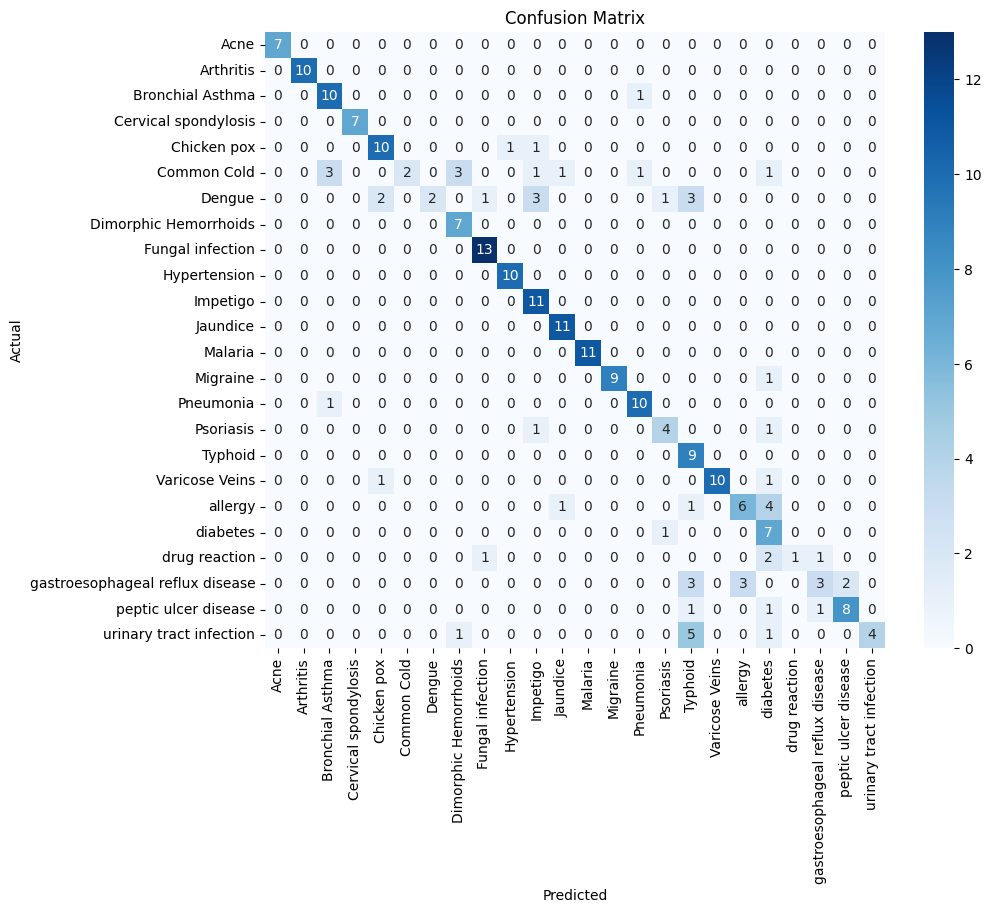

In [ ]:
# Step 1: Mount Google Drive and Load Data
from google.colab import drive
import pandas as pd
import numpy as np

drive.mount('/content/drive')

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Symptom2Disease.csv', delimiter=';')

# Step 2: Explore the dataset
print(data.head())  # Check the first few rows of the dataset
print(data.columns)  # Check column names

# Step 3: Extract features and labels
# Assuming 'symptoms' and 'disease' are the relevant columns
X = data['text'].values  # Features (text data)
y = data['label'].values  # Labels (classes)

# At this point, X contains your text (symptoms), and y contains the labels (disease).
# We will now move on to using BERT for classification.

from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 4: Encode labels (if they are categorical)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 5: Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
train_encodings = tokenizer(list(X_train), padding=True, truncation=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(X_test), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Convert labels to torch tensors
train_labels = torch.tensor(y_train)
test_labels = torch.tensor(y_test)

# Step 6: Prepare the dataset for Hugging Face's Trainer
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

# Step 7: Load pre-trained BERT for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Step 8: Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Step 9: Train the model using Trainer API
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

# Step 10: Evaluate the model
predictions = trainer.predict(test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
bert_accuracy = accuracy_score(y_test, y_pred)
print(f"BERT Accuracy: {bert_accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 11: Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_labels = label_encoder.classes_
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Step 8: Predict the disease for a new symptom
symptom = "My nails have small dents or pits in them, and they often feel inflammatory and tender to the touch. Even there are minor rashes on my arms."  # Input new symptom here
preprocessed_symptom = preprocess_text(symptom)  # Preprocess the symptom text

# Transform the preprocessed symptom using the same TF-IDF vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Use the trained KNN model to predict the disease for the new symptom
predicted_disease = knn_model.predict(symptom_tfidf)

# Step 9: Output the predicted disease
print(f'Predicted Disease: {predicted_disease[0]}')


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Step 8: Predict the disease for a new symptom
symptom = "common symptoms of malaria: fever, chills, headache, muscle aches, tiredness, nausea, vomiting, diarrhea, sweats, body aches, and jaundice (yellowing of the skin and whites of the eyes)"  # Input new symptom here
preprocessed_symptom = preprocess_text(symptom)  # Preprocess the symptom text

# Transform the preprocessed symptom using the same TF-IDF vectorizer used during training
symptom_tfidf = tfidf_vectorizer.transform([preprocessed_symptom])

# Use the trained KNN model to predict the disease for the new symptom
predicted_disease = knn_model.predict(symptom_tfidf)

# Calculate the probability for each class (KNN uses predict_proba for this)
predicted_probabilities = knn_model.predict_proba(symptom_tfidf)

# Get the probability/confidence for the predicted class
confidence = max(predicted_probabilities[0])  # The confidence level for the predicted disease

# Step 9: Output the predicted disease and confidence level
print(f'Predicted Disease: {predicted_disease[0]}')
print(f'Confidence Level: {confidence:.2f}')

# Step 10: List all diseases and their associated probabilities
disease_classes = knn_model.classes_  # Get the list of all possible disease classes
probabilities = predicted_probabilities[0]  # Get the probabilities for the current prediction

# Print all diseases with their associated probabilities
print("\nOther possible diseases with their confidence levels:")
for disease, prob in zip(disease_classes, probabilities):
    print(f"Disease: {disease}, Confidence Level: {prob:.2f}")

